# **INSIGHTS DA ANÁLISE EXPLORATÓRIA**

DADOS BRUTOS:
- Inicialmente, de 2007 a 2011, as planilhas são compostas por 25 abas.
- A partir de 2012 a 2019 se vê a adição de duas abas denominadas "E_Ajuste" e "M_Ajuste", mudando de 25 para 27 abas (Dando início a ajustes ao decorrer do tempo). 
- Em 2020, as abas de ajustes são dissolvidas nas abas de cada variável e paralelizadas em uma nova tabela abaixo das normais, reduzindo o número de abas para 25 novamente, entretanto, praticamente, dobrando a quantidade de tabelas. Estão inclusos nestas planilha os valores do ajuste estabelecido pela Portaria Interministerial MEC/ME nº 2, de 10 de agosto de 2020 e os valores do ajuste estabelecido pela Portaria Interministerial MEC/ME nº 3, de 25 de novembro de 2020. A partir de 2020, requer-se um tratamento diferenciado dos dados.
- Logo após, em 2021, 'E_COUN' é subdividida em 'E_COUN_VAAF' e 'E_COUN_VAAT', assim como 'M_COUN' para 'M_COUN_VAAF' e 'M_COUN_VAAT', reduzindo, novamente, o numero de abas para 27. Estão inclusos nestas planilhas os valores dos ajustes da complementação da União previsto na Portaria Interministerial nº 3 , de 24 de maio de 2020.
- Em 2022, são removidas as aba 'E_LC8796' e 'M_LC8796' e adicionadas as 'E_AFE_EC123' e 'M_AFE_EC123', mantendo o número de abas em 27.
- E por fim, em 2023, as abas 'E_AFE_EC123' e 'M_AFE_EC123' são removidas e a entram em cena as novas abas 'E_COUNT_VAAR' e 'M_COUNT_VAAR', mantendo o número de abas em 27. 

DADOS CONSOLIDADOS E SUMARIZADOS - INSIGHTS (GERAL, MEDIDAS DE CENTRALIDADE, DISPERSÃO, DISTRIBUIÇÃO, FREQUÊNCIA E PADRÕES):
- GERAL
    - Os dados brutos já foram previamente tratados para sua consolidação e sumarização (valores nulos, duplicados, constantes, dados sujos e inconsistentes).
    - Os dados possuem 1 variável de tempo, 3 categóricas e 15 numéricas.
    - A variável 'total' totaliza as demais variáveis numéricas.
    - Todas as variáveis numéricas possuem outliers.
    - Todas as variáveis numéricas são contínuas.
    - Valores negativos e alguns positivos se tratam de ajustes.
- DADOS TEMPORAIS
    - A variável 'data' vai de 2007-01-01 até 2024-03-31, mas não se tratam de valores únicos devido a duplicidade para diferenciação da variável categórica ajuste.
    - A variável 'data' possui uma amplitude de cerca de 17 anos.
    - A variável 'data' possue uma frequencia mensal.
- DADOS CATEGÓRICOS
    - A variável categórica 'esfera' contem 02 categorias ('ESTADUAL' e 'MUNICIPAL') e se distribuem quase que igualmente entre os dados, diferenciando-se apenas por ajustes e do distrito federal. 
    - A variável categórica 'uf' contem os 27 categorias (estados e o distrito federal) e são distribuídos quase que equivalentemente, com exceção do distrito federal.
    - A variável categórica 'ajuste' contem apenas 'True' e 'False', indicando se o registro contem valores de ajuste. A distribuição se concentra em 'False' com cerca de 98,5% dos registros de repasses normais. 
- DADOS NUMÉRICOS 
    - EC123/COUN/VAAF/VAAR/VAAT/AJUSTE: Nos indicam que 90% dos registros estarem zerados, com exceção 'coun' com cerca de 75%, ocasionando uma mediana 0, mas por sua breve ou recente existência.
    - Nenhumas das variáveis numéricas possuem uma distribuição normal.
    - Todas as variáveis numéricas possuem assimetria a direita.
    - Todas as variáveis numéricas possuem curtose leptocúrtica (pontiaguda).
    - ec123, vaar, vaaf, vaat e ajuste possuem uma distribuição similar.
    - Todos os dados numéricos possuem uma amplitude elevada
    - Todos os dados numéricos possuem um desvio padrão elevado.
    - As variáveis ajuste e ec123 possuem o coeficiente de variação extremamente elevados (~40 e 27)
    - As variáveis vaat, vaar e vaaf possuem o coeficiente de variação elevados (~7, 7, 5)
    - O menor coeficiente de variação é da variável fpe com menos de 1.
    - As variáveis icms, ipi, ipva, itcmd e itr possuem uma alta correlação (pearson)
    - Correlacionando as variáveis (pearson), identificou-se que mais contribuem com o total de repasses são, na ordem, icms, fpm, ipva, itcmd, ipi, itr e fpe.

# **OBJETIVOS**

- Time series
    - Total
        - Como foram distribuídos os recursos ao longo do tempo? (Total)
        - Qual a tendência/velocidade/aceleração dos recursos repassados? (Total)
        - Há padrões de sazonalidade? (Total)
        - Há padrões de sazonalidade de longo prazo? (Total)
        - Há uma autocorrelação no tempo? (Total)
    - Spheres
        - Como foram distribuídos os recursos ao longo do tempo? (Por esfera)
        - Em média, quanto é destinado anualmente a cada esfera?
        - Existe alguma correlação entre as variáveis ao longo do tempo?
    - Region
        - Como foram distribuídos os recursos ao longo do tempo? (Por região)
        - Qual o ranking médio anual por regiões que mais receberam recursos ao longo do tempo? (top and floor)
        - Qual o ranking médio anual por estado que mais receberam recursos ao longo do tempo? (top and floor)
    - Time siries vs Region
        - Existem eventos ou fatores específicos em cada estado que influenciam as tendências temporais?
        - As tendências temporais variam significativamente entre diferentes estados?
        - Existem padrões sazonais específicos para cada estado?
        - Existe uma correlação entre as séries temporais de diferentes esfera, regiões e estado?
    - I.A.
        - Com base nos padrões identificados, é possível prever futuros valores da série temporal?


# **IMPORTS/COMFIGIRAÇÕES**

In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
# Bibliotecas de manipulação
import numpy as np  # type: ignore # Manipulação de matrizes
import pandas as pd  # Manipulação de dados tabulares
# Bibliotecas de visualização gráfica
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import geopandas as gpd # type: ignore
import geobr # type: ignore
import plotly.express as px # type: ignore
# Bibliotecas próprias
from src.web_scraping import *  # Biblioteca própria para extração dos dados
from src.data_cleaning import *  # Biblioteca própria para transformação dos dados
from src.update_data import *  # Biblioteca própria para atualização dos dados
# Bibliotecas de processamento e pré-processamento
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler
from pmdarima.arima import auto_arima
# Biblioteca de filtro de notificações
import warnings
# Temas
from jupyterthemes import jtplot # type: ignore


warnings.filterwarnings(action='ignore')
pd.options.display.max_columns = None # type: ignore
pd.options.display.float_format = lambda x: f'{x:,.2f}'
jtplot.style(theme='onedork')
sns.set_style()
sns.color_palette("pastel", as_cmap=True)
sns.set_palette('pastel')
sns.color_palette("magma", as_cmap=True)

ModuleNotFoundError: No module named 'geobr'

In [2]:
df_base = pd.read_parquet('../data/processed/summarized_data_2.parquet')
df_base

,data,esfera,uf,ajustes,ec123,coun,vaaf,vaar,vaat,fpe,fpm,icms,ipi,ipva,itcmd,itr,lc8796,ajuste,total
index,,,,,,,,,,,,,,,,,,,
0,2007-01-01,ESTADUAL,AC,False,0.00,0.00,0.00,0.00,0.00,"9,679,990.36","1,582,026.94","3,147,424.17","3,548.46",0.00,0.00,0.00,0.00,0.00,"14,412,989.93"
2,2007-01-01,ESTADUAL,AL,False,0.00,0.00,0.00,0.00,0.00,"4,649,019.37","2,800,656.42","2,781,356.76","25,488.94",0.00,0.00,0.00,0.00,0.00,"10,256,521.49"
4,2007-01-01,ESTADUAL,AM,False,0.00,0.00,0.00,0.00,0.00,"5,436,974.54","2,819,795.95","19,285,518.14","401,249.83",0.00,0.00,0.00,0.00,0.00,"27,943,538.46"
6,2007-01-01,ESTADUAL,AP,False,0.00,0.00,0.00,0.00,0.00,"11,417,469.66","1,212,373.05","3,657,493.01","24,441.51",0.00,0.00,0.00,0.00,0.00,"16,311,777.23"
8,2007-01-01,ESTADUAL,BA,False,0.00,0.00,0.00,0.00,0.00,"8,860,187.40","8,866,635.04","17,745,924.57","569,490.71",0.00,0.00,0.00,0.00,0.00,"36,042,237.72"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22459,2024-04-01,MUNICIPAL,SE,True,0.00,0.00,0.00,"191,163.05","2,988,203.41",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,179,367.46"
22460,2024-04-01,MUNICIPAL,SP,False,0.00,0.00,0.00,"28,795,186.61","1,754,577.94","16,275,132.18","217,637,620.08","2,232,560,154.91","12,451,615.17","356,160,460.86","49,873,908.79","1,847,545.80",0.00,0.00,"2,917,356,202.34"
22461,2024-04-01,MUNICIPAL,SP,True,0.00,0.00,0.00,"1,871,231.67","107,225.12",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,978,457.79"


# **ANÁLISE DESCRITIVA**

- Como foram distribuídos os recursos ao longo do tempo? (Total)

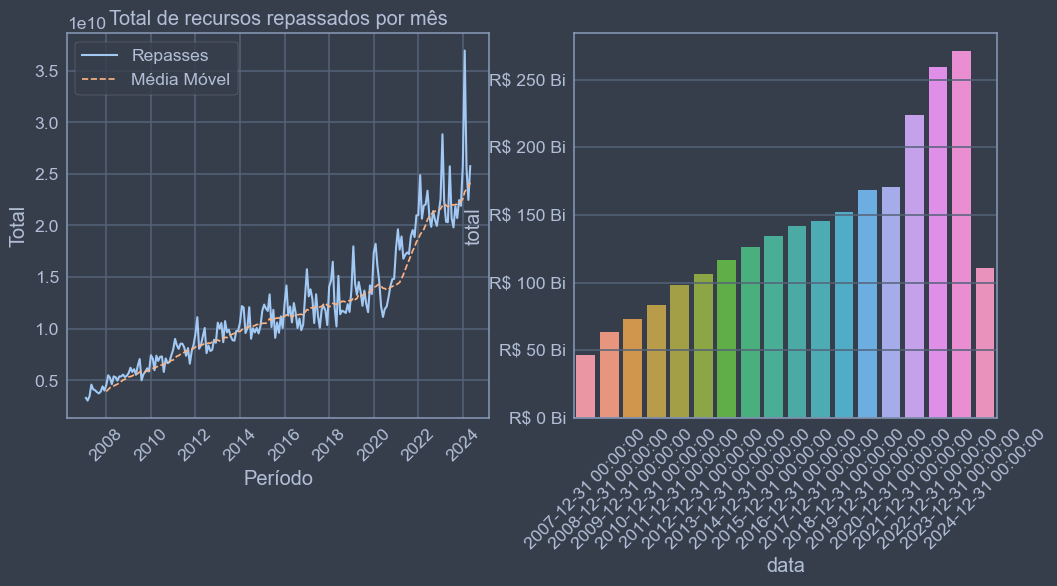

In [62]:
# Gráfico de linha
## Figura
fig, ax = plt.subplots(1, 2, figsize=(12,5))



# Gráfico 01
## Dados
df = df_base.resample(rule='M', on='data').sum()
df['media'] = df['total'].rolling(12).mean()
## Linha dos dados originais
sns.lineplot(
    data=df,
    ax=ax[0],
    x=df.index,
    y='total',
    errorbar=None,
    legend=True,
    linewidth=1.5
)
## Linha da média móvel
sns.lineplot(
    data=df,
    ax=ax[0],
    x=df.index,
    y='media',
    errorbar=None,
    legend=True,
    linestyle='--'
)
## Configuração gráficas
ax[0].set(title='Total de recursos repassados por mês', xlabel='Período', ylabel='Total')
def formatter(x, pos):
    return f'{x*1e-9:,.0f} Bi'
ax[0].yaxis.set_major_formatter(formatter)
ax[0].legend(labels=['Repasses', 'Média Móvel'])



# Gráfico 01
## Dados
df = df_base.resample(rule='Y', on='data').sum()
# df['media'] = df['total'].rolling(12).mean()
## Linha dos dados originais
sns.barplot(
    data=df,
    x=df.index,
    y='total'
)
# Configurações
ax[1].yaxis.set_major_formatter(formatter)



# Configurações gráficas gerais
for x in range(2):
    ax[x].tick_params(axis='x', labelrotation=45)
# plt.tight_layout()
plt.gca().set_yticklabels([f'R$ {y*1e-9:,.0f} Bi' for y in plt.gca().get_yticks()])
plt.show()

Os recursos do Fundeb deram início em janeiro de 2007 com um pouco mais de 3 bilhões mensais e continuam até então com mais de 20 bilhões mensais. 

- Qual a tendência/velocidade/aceleração dos recursos repassados?

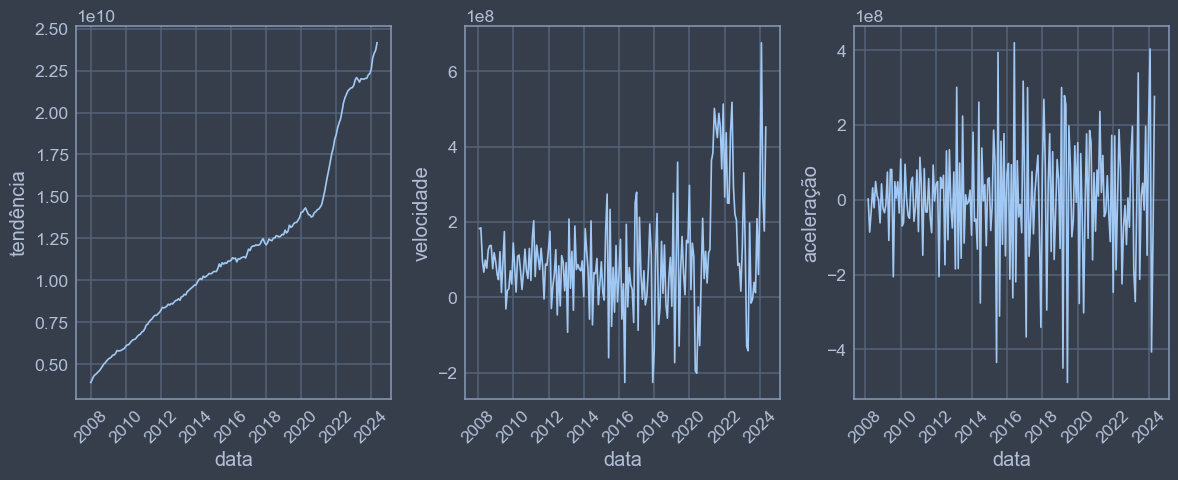

In [41]:
# Gráfico de linha
## Figura
fig, ax = plt.subplots(1, 3, figsize=(12,5))



# Gráfico 01
## Dados
df = df_base.resample(rule='M', on='data').sum()
df = df['total'].to_frame()
df['tendência'] = df['total'].rolling(12).mean()
df['velocidade'] = df['tendência'].diff()
df['aceleração'] = df['velocidade'].diff()
## Linha dos dados originais
sns.lineplot(
    data=df,
    x=df.index,
    y='tendência',
    ax=ax[0],
    errorbar=None,
    legend=True
)
sns.lineplot(
    data=df,
    x=df.index,
    y='velocidade',
    ax=ax[1],
    errorbar=None,
    legend=True
)
sns.lineplot(
    data=df,
    x=df.index,
    y='aceleração',
    ax=ax[2],
    errorbar=None,
    legend=True
)



# Configurações gerais
for x in range(3):
    ax[x].tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

Podemos perceber, de forma aparente, uma tendência de alta nos repasses, com um notório aumento da velocidade entre 2021 a 2022.

- Há padrões de sazonalidade? (Total)

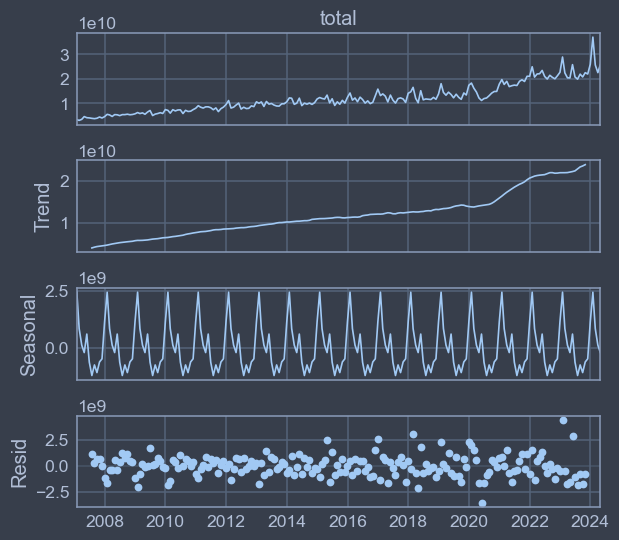

In [48]:
df = df_base.resample(rule='M', on='data').sum()
decompose = seasonal_decompose(x=df['total'], model='additive', period=12)
decompose.plot()
plt.show()

De acordo com a decomposição sazonal estatística, podemos notar claramente uma sazonalidade bem definida.

- Há alguma autocorrelação forte no tempo? (Total)

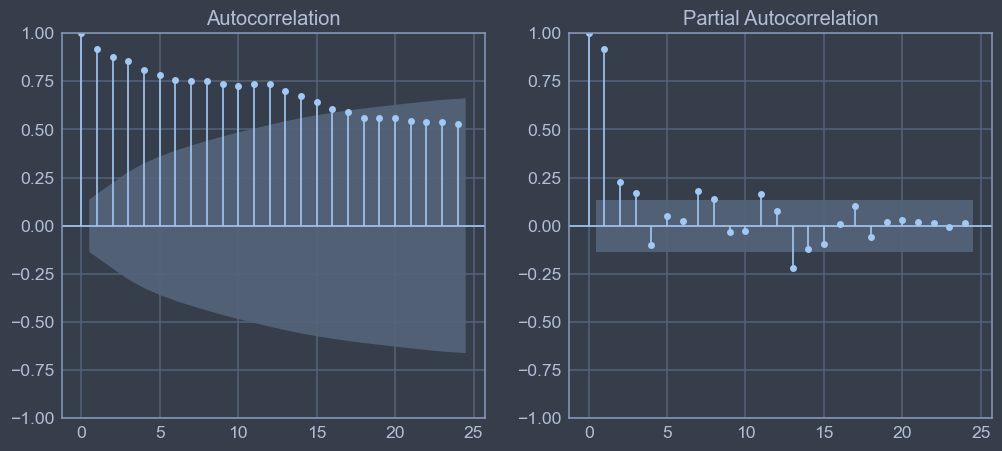

In [53]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

df = df_base.resample(rule='M', on='data').sum()
plot_acf(df.total, ax=ax[0])

plot_pacf(df.total, ax=ax[1])

plt.show()

Há uma autocorrelação da variável até 16 pontos de lag e uma autocorrelação parcial após o quinto ponto de lag.

- Como foram distribuídos os recursos ao longo do tempo? (Por esfera)

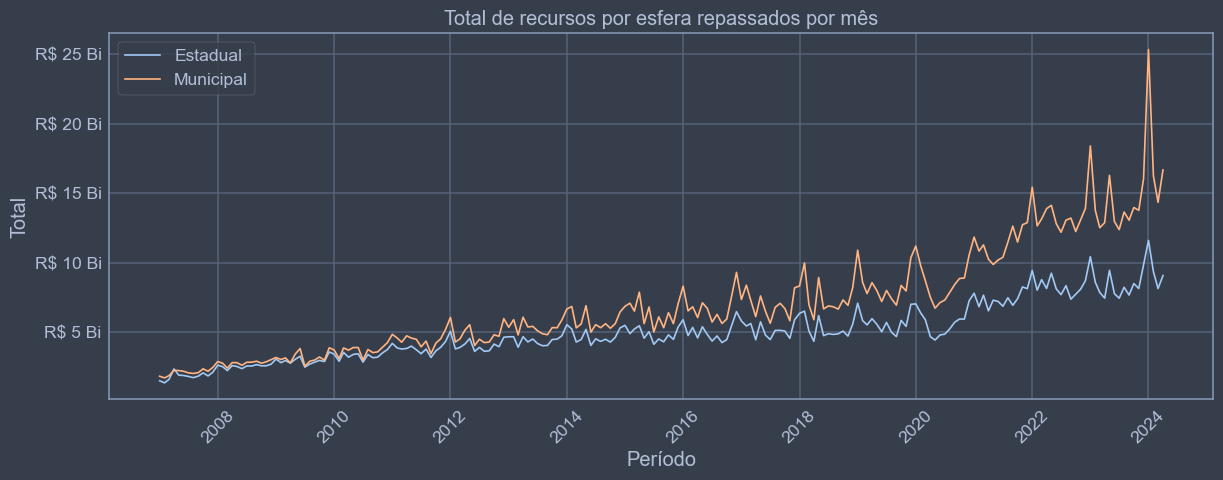

In [44]:
# Gráfico de linha
## Figura
fig, ax = plt.subplots(1, 1, figsize=(12,5), sharex=True, sharey=True)

# Gráfico 01
## Dados gráfico
df = df_base.groupby(['data', 'esfera']).sum()
## Gráfico
sns.lineplot(
    data=df,
    ax=ax,
    x=df.index.get_level_values(0),
    y='total',
    hue=df.index.get_level_values(1),
    legend=True,
    errorbar=None
)
## Configuração gráficas
ax.set(title='Total de recursos por esfera repassados por mês', xlabel='Período', ylabel='Total')
ax.tick_params(axis='x', labelrotation=45)
ax.legend(labels=['Estadual', 'Municipal'])



# Configurações gráficas gerais
plt.tight_layout()
plt.gca().set_yticklabels([f'R$ {y*1e-9:,.0f} Bi' for y in plt.gca().get_yticks()])
plt.show()

- Em média, quanto é destinado anualmente a cada esfera?

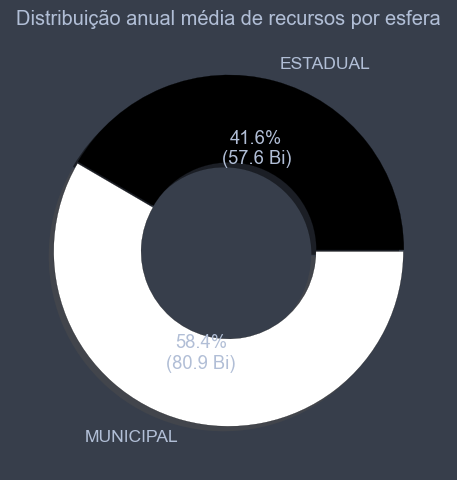

In [25]:
# Gráfico de rosca
## Figura
fig, ax = plt.subplots(1,1,figsize=(12,5))


## Gráfico
### Dados
df = df_base.groupby(['data', 'esfera']).sum().reset_index()
df['ano'] = df.data.dt.year
df = df.groupby(['ano', 'esfera']).sum().reset_index()
df = df.groupby('esfera').mean()
### Gráfico
data = df.total.to_list()
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))/1000000000
    return f"{pct:.1f}%\n({absolute:,.1f} Bi)"
plt.pie(
    data=df,
    x='total',
    autopct=lambda pct: func(pct, data),
    labels= df.index,
    explode=[.01,0],
    shadow=True,
    normalize=True,
    radius=1,
    colors=['black', 'white'],
    wedgeprops=dict(width=0.5, edgecolor='black')
)
### Configurações
ax.set(title='Distribuição anual média de recursos por esfera')


## Plot
plt.tight_layout()
plt.show()

- Como foram distribuídos os recursos ao longo do tempo? (Por UF/região)

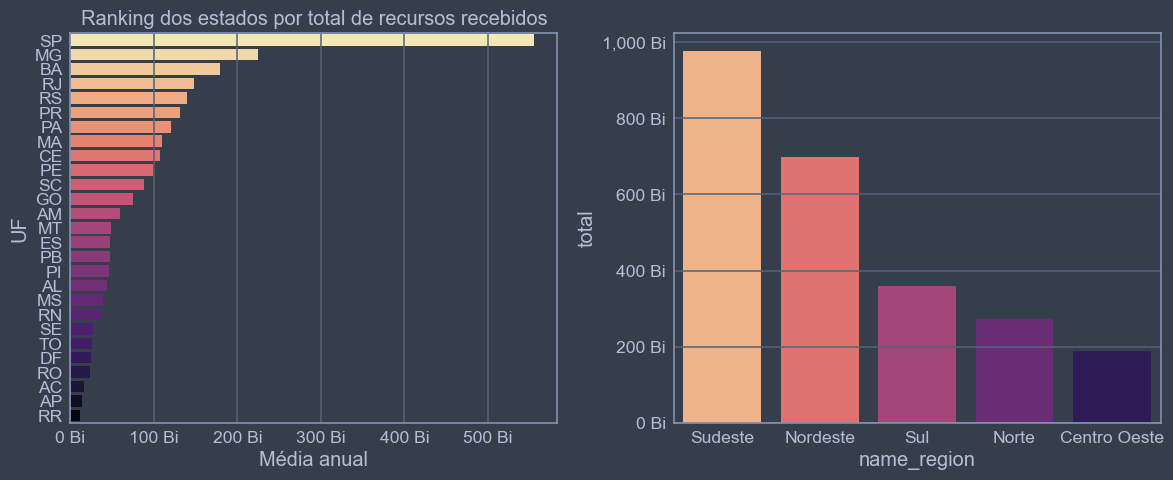

In [3]:
# Ranking
## Figura
fig, ax = plt.subplots(1,2,figsize=(12,5))
## Base de dados
df = df_base.groupby(['data', 'esfera', 'uf'])['total'].sum().reset_index()
df['ano'] = df.data.dt.year
df = df.groupby(['esfera', 'ano', 'uf']).sum()



## Gráfico 01
### Dados gráfico
df1 = df.groupby('uf').sum().sort_values(by='total', ascending=False)
### Gráfico
sns.barplot(
    data=df1,
    ax=ax[0],
    x='total',
    y=df1.index,
    errorbar=None,
    palette='magma_r'
)
### Configurações
ax[0].set(title='Ranking dos estados por total de recursos recebidos', ylabel='UF', xlabel='Média anual')
def formatter(x, pos):
    return f'{x*1e-9:,.0f} Bi'
ax[0].xaxis.set_major_formatter(formatter)



## Gráfico 02
### Dados gráfico
gdf = geobr.read_state(year=2020)
df2 = pd.merge(
    left=df.reset_index(),
    right=gdf,
    how='outer',
    left_on='uf',
    right_on='abbrev_state'
)
df2 = df2.groupby(['ano', 'name_region']).sum()
df2 = df2.groupby('name_region').sum().sort_values(by='total', ascending=False)
### Gráfico
sns.barplot(
    data=df2,
    ax=ax[1],
    x=df2.index,
    y='total',
    palette='magma_r'
)
### Configurações
def formatter(x, pos):
    return f'{x*1e-9:,.0f} Bi'
ax[1].yaxis.set_major_formatter(formatter)



## Plot
plt.tight_layout()
plt.show()

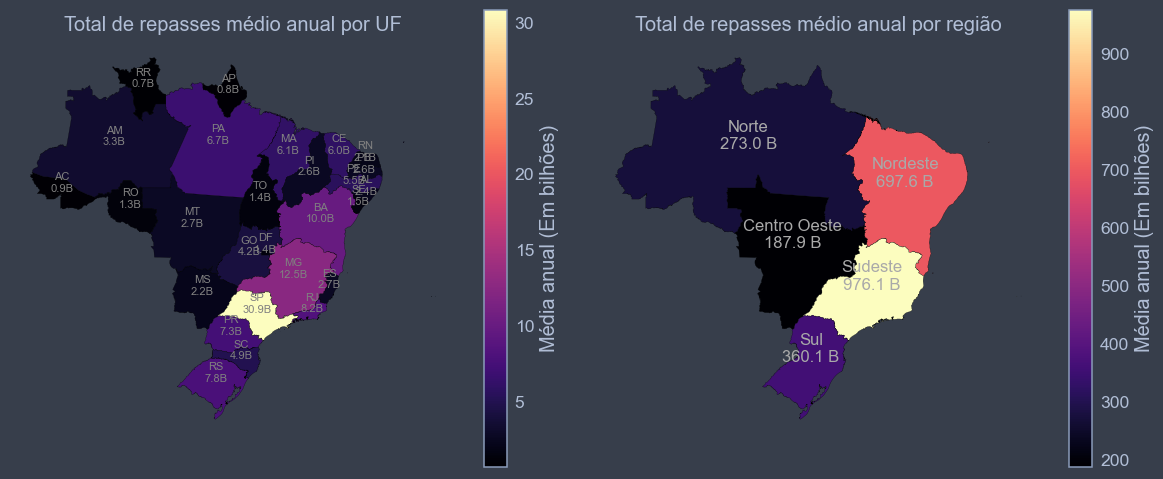

In [ ]:
# Gráficos geoespaciais
# Figura
fig, ax = plt.subplots(1,2, figsize=(12, 5), sharey=True, sharex=True)

# Gráfico 01
## Dados gráfico
df = df_base.copy()
df['ano'] = df.data.dt.year
df = df.groupby(['ano', 'uf']).sum().reset_index()
df = df.groupby(['uf']).sum()
gdf = geobr.read_state(year=2020)
df = pd.merge(
    left=df,
    right=gdf,
    left_on='uf',
    right_on='abbrev_state',
    how='outer'
)
df['total'] = df['total']/1000000000
df = gpd.GeoDataFrame(data=df, geometry='geometry') # type: ignore
df.crs = 'EPSG:4326'
## Gráfico
g = df.plot(
    ax=ax[0],
    column='total',
    k=6,
    vmin=df.total.min(),
    vmax=df.total.max(),
    cmap='magma',
    legend=True,
    legend_kwds={
        'label': 'Média anual (Em bilhões)',
        'fmt': 'R${:.1f}Bi'
        },
    edgecolor='black', 
    )
## Configurações gráficas
g.set_axis_off()
g.set(title='Total de repasses médio anual por UF')
for i, v in df.iterrows():
    ax[0].text(
        x=v.geometry.centroid.x,
        y=v.geometry.centroid.y,
        s=f'{v.abbrev_state}\n{v.total:,.1f}B',
        fontsize=8,
        color='gray',
        ha='center'
    )



# Gráfico 02
## Dados gráfico
df = df_base.copy()
df['ano'] = df.data.dt.year
df = df.groupby(['ano', 'uf']).sum().reset_index()
gdf = geobr.read_state()
df = pd.merge(
    left=df,
    right=gdf,
    how='outer',
    left_on='uf',
    right_on='abbrev_state'
)
gdf = geobr.read_region()
df = pd.merge(
    left=df,
    right=gdf,
    how='outer',
    on='name_region',
    suffixes=['_estado', '_regiao']
)
df = df.groupby(['name_region', 'geometry_regiao']).sum().reset_index()
df['total'] = df['total']/1000000000
df = gpd.GeoDataFrame(data=df, geometry='geometry_regiao') # type: ignore
df.crs = 'EPSG:4326'
## Gráfico
g2 = df.plot(
    ax=ax[1],
    column='total',
    k=6,
    cmap='magma',
    legend=True,
    legend_kwds={
        'label': 'Média anual (Em bilhões)',
        'fmt': 'R${:.1f}Bi'
        },
    edgecolor='black',
    vmin=df.total.min(),
    vmax=df.total.max(),
)
## Configurações gráficas
g2.set_axis_off()
g2.set(title='Total de repasses médio anual por região')
for i, v in df.iterrows():
    ax[1].text(
        x=v.geometry_regiao.centroid.x,
        y=v.geometry_regiao.centroid.y,
        s=f'{v.name_region}\n{v.total:,.1f} B',
        fontsize=12,
        color='darkgray',
        ha='center'
    )

# Configurações gerais
plt.tight_layout()
plt.show(g)

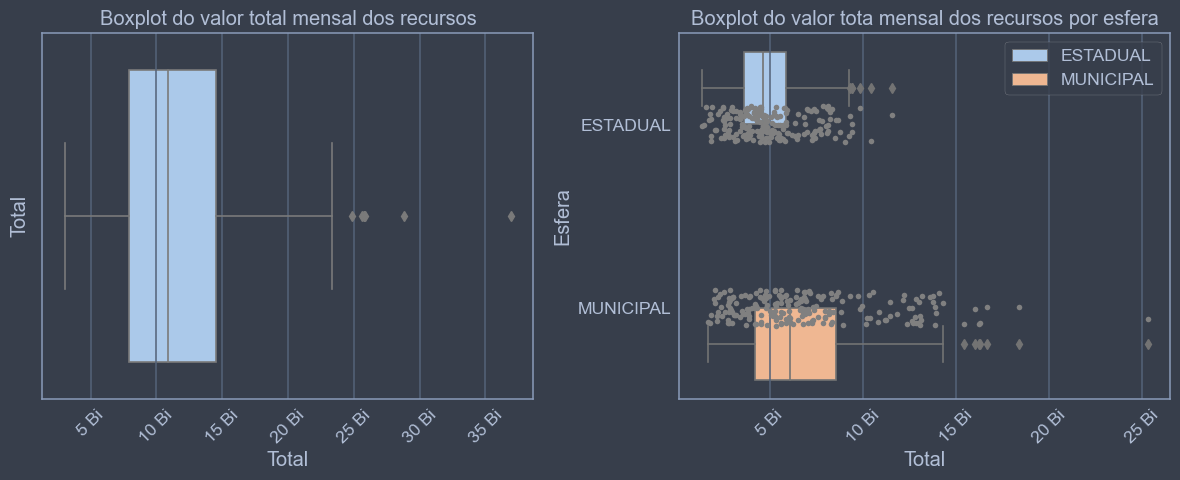

In [6]:
# Gráfico de caixa
fig, ax = plt.subplots(1,2,figsize=(12,5))

## Gráfico 01
### Dados gráfico
df = df_base.copy()
df = df.groupby(['data']).sum()
df.head()
### Gráfico
g = sns.boxplot(
    data=df,
    ax=ax[0],
    x='total',
    # formatter=f'{:,.2f}'
    )
### Configurações
ax[0].set(title='Boxplot do valor total mensal dos recursos', xlabel='Total', ylabel='Total')
ax[0].tick_params(axis='x', rotation=45)

## Gráfico 02
### Dados gráfico
df = df_base.groupby(['data', 'esfera']).sum().reset_index()
### Gráfico
g2 = sns.boxplot(
    data=df,
    ax=ax[1],
    y='esfera',
    x='total',
    hue='esfera'
    )
### Configurações
ax[1].set(title='Boxplot do valor tota mensal dos recursos por esfera', ylabel='Esfera', xlabel='Total')
ax[1].tick_params(axis='x', rotation=45)
sns.stripplot(df, x="total", y="esfera", size=4, color="gray")

## Configurações gerais
def currency(x, pos):
    return f'{x/1e9:.0f} Bi'
for axi in ax:
    axi.xaxis.set_major_formatter(currency)


## Plot
plt.tight_layout()
plt.show()

De modo geral, podemos notar uma maior concentração de valores a esquerda do gráfico, com alguns outliers a direita, além de perceber que há uma significativa diferença entre as distribuições de recursos por esfera, onde a esfera municipal se sobre sai à esfera estadual, ou seja, os municípios recebem mais repasses em sua totalidade que os estados. 

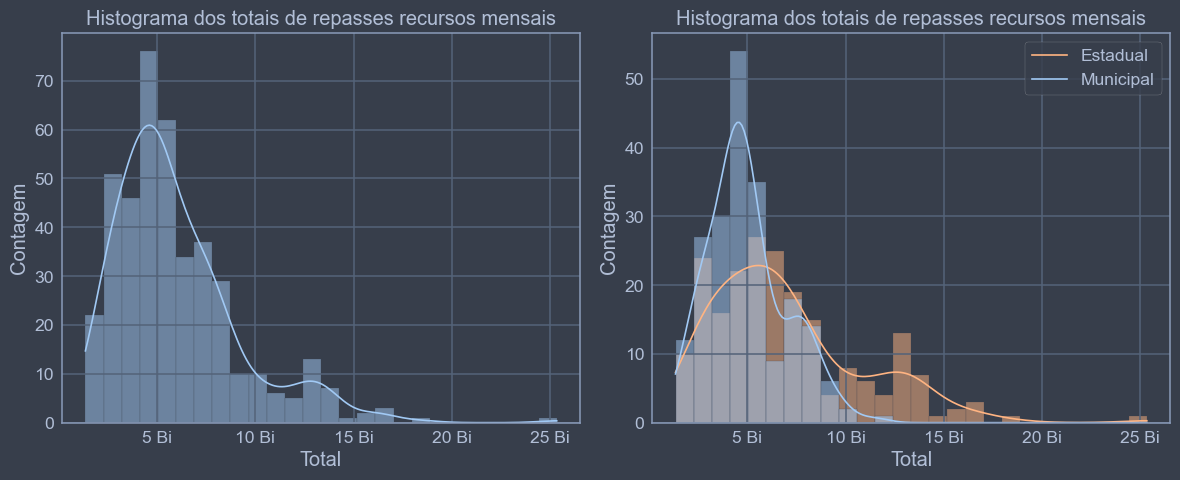

In [7]:
# Histograma
## Figura
fig, ax = plt.subplots(1,2,figsize=(12,5))



## Gráfico 01
### Dados gráfico
df = df_base.groupby(['data', 'esfera']).sum()
### Gráfico
sns.histplot(
    data=df,
    ax=ax[0],
    x='total',
    kde=True,
)
### Configurações
ax[0].set(title='Histograma dos totais de repasses recursos mensais', ylabel='Contagem', xlabel='Total')



## Gráfico 02
### Dados
df = df.copy()
### Gráfico
sns.histplot(
    data=df,
    ax=ax[1],
    x='total',
    kde=True,
    hue='esfera'
)
### Configurações
ax[1].set(title='Histograma dos totais de repasses recursos mensais', ylabel='Contagem', xlabel='Total')
ax[1].legend(labels=['Estadual', 'Municipal'])



## Configurações gerais
for axi in ax:
    axi.xaxis.set_major_formatter(currency)


## Plot
plt.tight_layout()
plt.show()

Estatisticamente, observamos um histograma com assimetria á direita, em ambas as esferas, contudo, nota-se um menor nível de kurtose na esfera estadual, evidenciando sua distribuição menos concentrada em relação a esfera municipal.

Podemos ver que há uma tendência de alta em ambos os gráficos para ambas as esferas, no entanto, é nítida a maior contribuição à esfera municipal. 

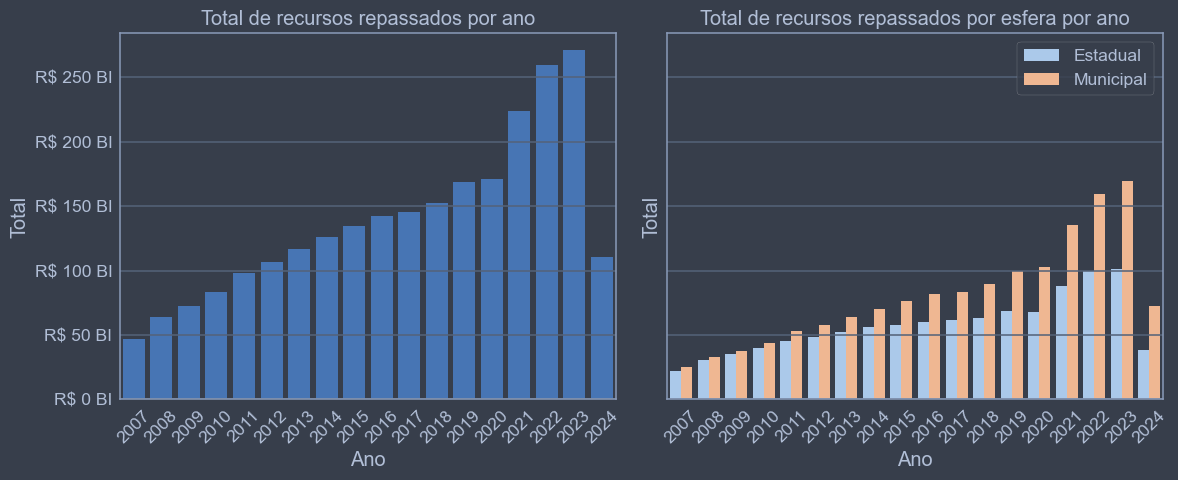

In [27]:
# Gráfico de barras
# Figura
fig, ax = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)

# Gráfico 01
## Dados gráfico
df = df_base.resample(rule='Y', on='data').sum()
## Gráfico
sns.barplot(
    data=df,
    ax=ax[0],
    x=df.index,
    y='total',
    color='b'
    )
## Configuração gráficas
ax[0].set(title='Total de recursos repassados por ano', ylabel='Total', xlabel='Ano')
ax[0].tick_params(axis='x', rotation=45)

# Gráfico 02
## Dados gráficos
df = df_base.copy()
df['ano'] = df.data.dt.year
df = df.groupby(['ano', 'esfera']).sum().reset_index()
## Gráfico
g = sns.barplot(
    data=df,
    x=df.ano,
    y='total',
    hue=df.esfera,
    errorbar=None
    )
## Configurações gráficas
ax[1].set(title='Total de recursos repassados por esfera por ano', ylabel='Total', xlabel='Ano')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(['Estadual', 'Municipal'])

# Configurações gráficas gerais
plt.gca().set_yticklabels([f'R$ {y/1000000000:,.0f} BI' for y in plt.gca().get_yticks()])
plt.gca().set_xticklabels([f'{y}' for y in range(2007, 2025)])

#Plot
plt.tight_layout()
plt.show()

- Há padrões de sazonalidade no total de recursos repassados?

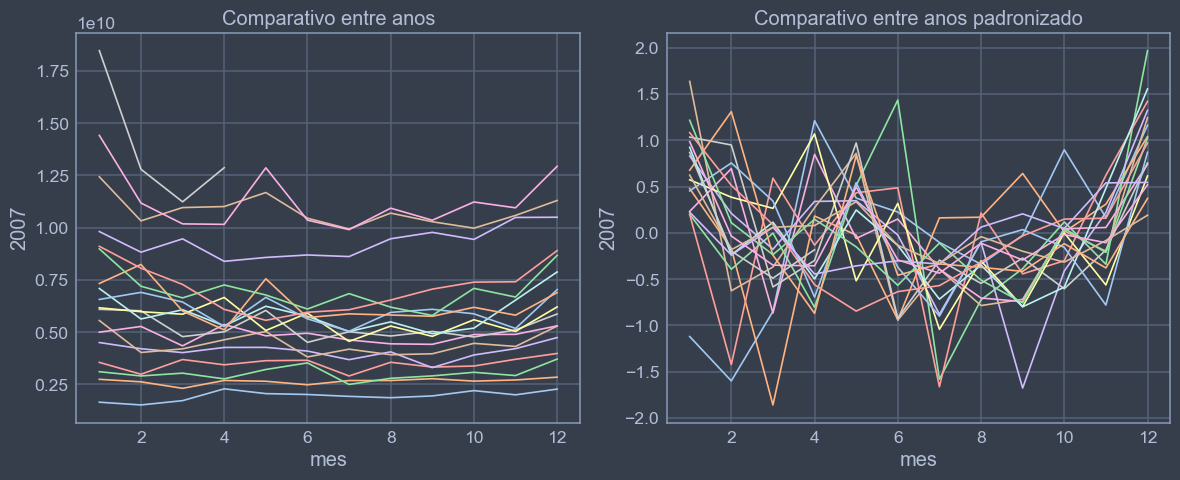

In [5]:
# Gráfico comparativo entre anos
## Figura
fig, ax = plt.subplots(1,2,figsize=(12,5))

## Gráfico 01
### Dados
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer



df = df_base.groupby(['data', 'esfera']).sum().reset_index()
df['ano'] = df.data.dt.year
df['mes'] = df.data.dt.month
df = df[['esfera', 'ano', 'mes', 'total']]
df = pd.pivot_table(
    data=df, # type: ignore
    values='total',
    index=['esfera','mes'],
    columns='ano',
    aggfunc='sum'
) # type: ignore
df.columns = [str(x) for x in df.columns]
### Gráfico
for i in range(2007,2025):
    sns.lineplot(
        data=df,
        ax=ax[0],
        x='mes',
        y=f'{i}',
        errorbar=None
    )
### Configurações
ax[0].set(title='Comparativo entre anos')


## Gráfico 02
### Dados
indexs = df.index
columns = [str(x) for x in df.columns]
data_array = df.values
scaler = StandardScaler()
df_s = scaler.fit_transform(data_array)
df_s = pd.DataFrame(df_s, index=indexs, columns=columns)
### Gráfico
for i in range(2007,2025):
    sns.lineplot(
        data=df_s,
        ax=ax[1],
        x='mes',
        y=f'{i}',
        errorbar=None,
        legend=True
    )
### Configurações
ax[1].set(title='Comparativo entre anos padronizado')


## Plot
plt.tight_layout()
plt.show()

- Qual o ranking por esfera, regiões e estado que mais receberam recursos ao longo do tempo? (top and floor)

- Existe alguma correlação entre as variáveis ao longo do tempo?

In [ ]:
# Scatter

In [ ]:
gdf.head()